In [1]:
# Step-1: Importing the necessary libraries

import pandas as pd
import numpy as np

In [24]:
# Step-2: Loading dataset

df = pd.read_csv("city_day.csv")
df.head()

# Displaying df information
print("Information in the csv file:\n", df.info(), "\n\n")

# Displaying descriptive statistics
print("Describing the \n", df.describe(), "\n\n")

# Checking the missing values
print("Null values in the csv file:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
Information in the csv file:
 None 


Describing the 
               PM2.5          PM10            

In [27]:
import seaborn as sns

<Axes: xlabel='AQI', ylabel='Count'>

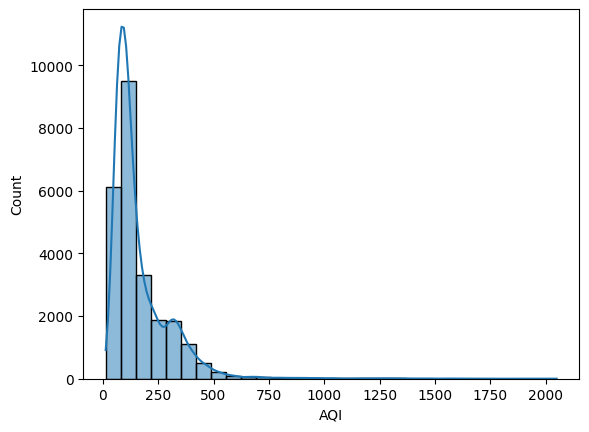

In [31]:
sns.histplot(df['AQI'].dropna(),bins = 30, kde = True)

In [39]:
# Step-3: Data preprocessing

from sklearn.impute import SimpleImputer

# Selecting the columns 
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
            'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

In [41]:
df = df.dropna(subset = [target])

In [43]:
# Handling missing values

imputer = SimpleImputer(strategy = 'mean')
df[features] = imputer.fit_transform(df[features])

C:\Users\hibah\AppData\Local\Temp\ipykernel_17476\1460758717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = imputer.fit_transform(df[features])


In [45]:
# Splitting the dataset into training and testing

x = df[features]
y = df[target]

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
# Normaize or standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
# Step-4: Train models
# Train Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [59]:
# Predict AQI
y_pred_dt = dt.predict(x_test)

In [61]:
# Support Vector Machine
from sklearn.svm import SVR

In [63]:
svr = SVR(kernel = 'rbf')
# rbf : radial basis function
svr.fit(x_train, y_train)

SVR()

In [65]:
# Predict AQI
y_pred_svm = svr.predict(x_test)

In [67]:
from sklearn.linear_model import LinearRegression
# Train Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
# Predict AQI
y_pred_lr = lr.predict(x_test)

In [69]:
# Step-5: Evaluate Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def evaluate_model(y_test, y_pred, model):
    print("Model name:", model)
    print("Mean absolute error:", mean_absolute_error(y_test,))


In [ ]:
mean_absolute_error(y_test, y_pred_dt)